### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


##### A)  Get the information on the 'data' DataFrame.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

##### B) Get the Column-wise null value in DataFrame to see which data column may not have enough data for use.

In [12]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

##### C)  Observations for null/missing values from above cell
- Based on data distribution it clearly shows that 'car' column data is irreleveant because we see about 12576 missing values. 
we would not be considering the 'car' column.

##### D) Get an high level view of unique values for each of the columns in the DataFrame for categorization and cleaning.

In [15]:
print(data.apply(lambda col: col.unique()))
data.shape

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $499

(12684, 26)

##### E)  Get an an idea of coupon acceptance based on each of the 'coupon' category.

In [17]:
df2 = data.groupby('coupon')[['Y']].sum()
print(df2)

                          Y
coupon                     
Bar                     827
Carry out & Take away  1760
Coffee House           1995
Restaurant(20-50)       658
Restaurant(<20)        1970


##### F1)  Create a new Dataframe (df1) based on just the column attribute of interest ('toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','Y')
##### F2)  Get the counts of coupon used based on the distance to coupon location

In [19]:
df1 = data[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','Y']]
df1[(df1.Y == 1)].value_counts()

toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  Y
1                 0                  0                  1    3416
                  1                  0                  1    3146
                                     1                  1     648
Name: count, dtype: int64

#### Based on the observation (F step) above
 - There were "3416" coupons used in journey, if the location was 5 min away
 - There were "3146" coupons used in journey,  if the location was 15 min away
 - There were "648" coupons used in journey, if the location was 25 min away

<span style="color:green">Key Observation: As the time to reach coupon location increases the coupon usage decreased.</span>

#####  G1)  Find the unique values for 'maritalStatus' column in DataFrame', heps to analyze any data updates if needed to clean the data.

In [22]:
data['maritalStatus'].sort_values().unique()

array(['Divorced', 'Married partner', 'Single', 'Unmarried partner',
       'Widowed'], dtype=object)

#####  G2)  Find the unique values for 'education' column in DataFrame', heps to analyze any data updates if needed to clean the data.

In [24]:
data['education'].sort_values().unique()

array(['Associates degree', 'Bachelors degree',
       'Graduate degree (Masters or Doctorate)', 'High School Graduate',
       'Some High School', 'Some college - no degree'], dtype=object)

#####  G3)  Find the unique values for 'occupation' column in DataFrame', heps to analyze any data updates if needed to clean the data.

In [26]:
data['occupation'].sort_values().unique()

array(['Architecture & Engineering',
       'Arts Design Entertainment Sports & Media',
       'Building & Grounds Cleaning & Maintenance',
       'Business & Financial', 'Community & Social Services',
       'Computer & Mathematical', 'Construction & Extraction',
       'Education&Training&Library', 'Farming Fishing & Forestry',
       'Food Preparation & Serving Related',
       'Healthcare Practitioners & Technical', 'Healthcare Support',
       'Installation Maintenance & Repair', 'Legal',
       'Life Physical Social Science', 'Management',
       'Office & Administrative Support', 'Personal Care & Service',
       'Production Occupations', 'Protective Service', 'Retired',
       'Sales & Related', 'Student', 'Transportation & Material Moving',
       'Unemployed'], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon? 



H)  Percentage of coupon usage for in comparision to total observation recorded.

In [30]:
# Get the coupon count accepted and not accepted count from entire data.
coupon_count_usage = data.Y.rename('Used').value_counts()

# Get the coupon count accepted and not accepted percentages from entire data.
percent_coupon_distribution = data.Y.rename('Used').value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

# Create a DataFrame that has Coupon Used, its count and percentage to give a clear view
pd.DataFrame({"Coupon_usage_Count":coupon_count_usage, "Coupon_Usage_Percent":percent_coupon_distribution})

,Coupon_usage_Count,Coupon_Usage_Percent
Used,,
1,7210,56.84%
0,5474,43.16%


<span style="color:green">Observation: 56.84% accepted the coupon from the total observations recorded.</span>

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

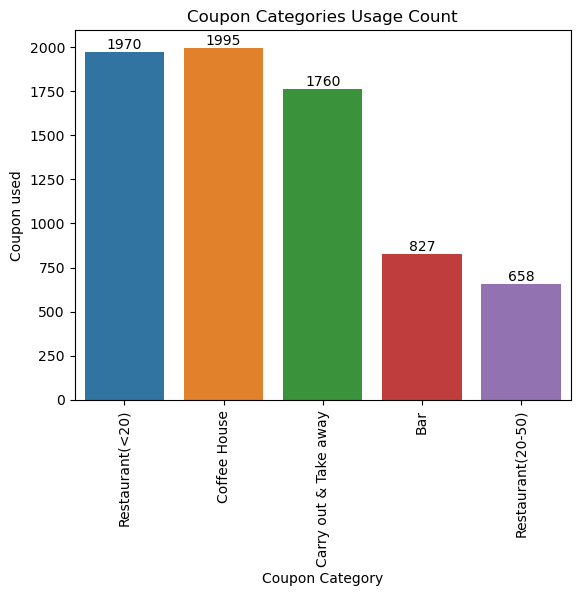

In [33]:
# Create a bar plot to visualize the coupon usage count based on coupon category
ax = sns.barplot(data, x="coupon", y="Y", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Coupon Categories Usage Count")
plt.xlabel("Coupon Category")
plt.ylabel("Coupon used")
plt.xticks(rotation=90)

6. Use a histogram to visualize the temperature column.

In [35]:
data[['temperature', 'Y']].groupby('temperature')[['Y']].value_counts()

temperature  Y
30           1    1230
             0    1086
55           1    2061
             0    1779
80           1    3919
             0    2609
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Temperature')

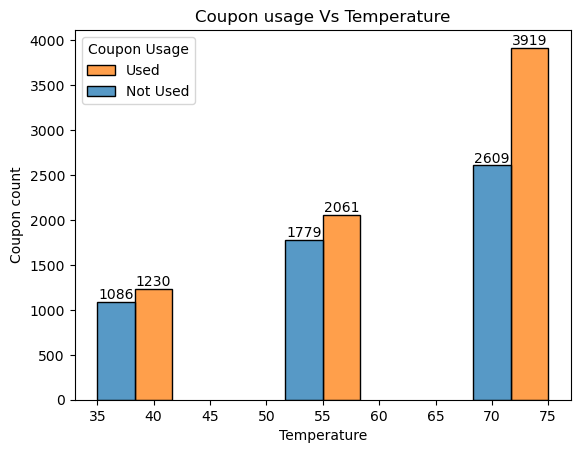

In [36]:
ax1 = sns.histplot(data, x='temperature', bins = 3, hue = 'Y', multiple="dodge", shrink=.4)
for container in ax1.containers:
    ax1.bar_label(container)
plt.title("Coupon usage Vs Temperature")
plt.legend(title='Coupon Usage', loc='upper left', labels=['Used', 'Not Used'])
plt.ylabel("Coupon count")
plt.xlabel("Temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [38]:
# df_bar_coupons DataFrame created just having bar coupons
df_bar_coupons = data[data['coupon'] == 'Bar']

In [39]:
# In df_bar_coupons DataFrame drop null values.
df_bar_coupons = df_bar_coupons.dropna(subset=['Bar'])

In [40]:
# Create a bar coupon acceptance list handy for extracting the coupon acceptance from df_bar_coupons DataFrame.
bar_coupon_list = (df_bar_coupons['Y'] == 1)

2. What proportion of bar coupons were accepted?


In [42]:
# Proportion (Percent) of bar coupons were accepted
percent_bar_coupon_used = (df_bar_coupons[bar_coupon_list]['Y'].sum()/df_bar_coupons.shape[0])*100
print("Proportion of bar coupons were accepted = ",percent_bar_coupon_used,"%")

Proportion of bar coupons were accepted =  41.032064128256515 %


<span style="color:green">Observation: 41.03% accepted the bar coupon.</span>

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [45]:
# Get the unique values of 'Bar' values to check if this needs cleaning and trasnformation
df_bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [46]:
# Function to transform the values to integer for easier compute operations
def bar_count_transform(param):
    if param in ['never']:
        return 0
    elif param in ['less1']:
        return 1
    elif param in ['1~3']:
        return 3
    elif param in ['4~8']:
        return 8
    elif param in ['gt8']:
        return 9
    else:
        return -1   

In [47]:
# Create a 'BarCount' column in the 'df_bar_coupons' dataframe after transforming the 'Bar' columnn Values using apply lambda function.
df_bar_coupons['BarCount'] = df_bar_coupons['Bar'].apply(bar_count_transform)

In [48]:
# Create a bar coupon acceptance condition list handy for extracting the coupon acceptance from df_bar_coupons DataFrame.
bar_count_lteq3_list = (df_bar_coupons['BarCount'] <= 3)
bar_count_gt3_list = (df_bar_coupons['BarCount'] > 3)

In [49]:
# Taking the sum of values add all the 1's associated with 'Y' column gives only the acceptance value.
less_than_eq_3_acceptance = df_bar_coupons[(bar_count_lteq3_list) & (bar_coupon_list)][['Y']].sum()
greater_than_3_acceptance = df_bar_coupons[(bar_count_gt3_list) & (bar_coupon_list)][['Y']].sum()
print("Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more = ", round(less_than_eq_3_acceptance/greater_than_3_acceptance, 2))

Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more =  Y    4.35
dtype: float64


<span style="color:green">Observation: Acceptance rate between those who went to a bar 3 or fewer times a month is <b> 4.35 times higher</b> than to those who went more </span>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [52]:
# Get the unique values of 'age' values to check if this needs cleaning and trasnformation
df_bar_coupons['age'].sort_values().unique()

array(['21', '26', '31', '36', '41', '46', '50plus', 'below21'],
      dtype=object)

In [53]:
#Function to transform the age to integer for easy comparision operation 
def age_transform(param):
    if param in ['below21']:
        return 20
    elif param in ['21']:
        return 21       
    elif param in ['26']:
        return 26
    elif param in ['31']:
        return 31
    elif param in ['36']:
        return 36
    elif param in ['41']:
        return 41
    elif param in ['46']:
        return 46
    elif param in ['50plus']:
        return 50
    else:
        return -1  

In [54]:
# Applying the age_transform function on 'age' column and storing the transformed value into new column 'age_transform'
df_bar_coupons['age_transform'] = df_bar_coupons['age'].apply(age_transform)

In [55]:
# Create a bar coupon acceptance condition list handy for extracting the coupon acceptance from df_bar_coupons DataFrame

# Condition 1: 
bar_count_age_gt25_list = (df_bar_coupons['age_transform'] > 25)

# Condition 2:
bar_count_gt1_list = (df_bar_coupons['BarCount'] > 1)

In [56]:
# Taking the sum of values add all the 1's associated with 'Y' column gives the acceptance value for the conditions applied on 
# df_bar_coupons DataFrame.
gt_1_barcount_gt_25_age_acceptance = df_bar_coupons[(bar_count_age_gt25_list) & (bar_coupon_list) & (bar_count_gt1_list)]['Y'].sum()
all_other_acceptance = df_bar_coupons[bar_coupon_list]['Y'].sum() - gt_1_barcount_gt_25_age_acceptance
#print("Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others = ", round(gt_1_barcount_gt_25_age_acceptance/all_other_acceptance, 2))

<span style="color:green">Observation: Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is <b> 0.55 times </b> to the all others </span>

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [59]:
# Create DateFrame after applying conditions to extract data from "df_bar_coupons" DataFrame
bar_count_nofarm_list = (~df_bar_coupons['occupation'].str.upper().str.contains('FARMING FISHING & FORESTRY'))
bar_count_nokid_passanger_list = (~df_bar_coupons['passanger'].str.upper().str.contains('KID'))
df_bar_coupons[bar_count_nokid_passanger_list].shape

(1793, 28)

In [60]:
# Applying the conditions on 'df_bar_coupons' DataFrame to get the Dat
gt_1_barcount_gt_25_age_nofarm_nokid_acceptance = df_bar_coupons[(bar_coupon_list) & (bar_count_gt1_list)  & (bar_count_nofarm_list) & (bar_count_nokid_passanger_list)]['Y'].sum()
#print(gt_1_barcount_gt_25_age_nofarm_nokid_acceptance, df_bar_coupons.shape[0])
#(gt_1_barcount_gt_25_age_nofarm_nokid_acceptance/df_bar_coupons.shape[0])*100

<span style="color:green">Observation: Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is <b> 19.69% </b> to the all others </span>

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [63]:
#Function to transform the income to integer for easy comparision operation 
def income_transform(param):
    if param in ['Less than $12500']:
        return 12499
    elif param in ['$12500 - $24999']:
        return 24999       
    elif param in ['$25000 - $37499']:
        return 37499
    elif param in ['$37500 - $49999']:
        return 49999
    elif param in ['$50000 - $62499']:
        return 62499
    elif param in ['$62500 - $74999']:
        return 74999
    elif param in ['$75000 - $87499']:
        return 87499
    elif param in ['$87500 - $99999']:
        return 99999
    elif param in ['$100000 or More']:
        return 100000
    else:
        return -1  

In [64]:
# Applying the age_transform function on 'income' column and storing the transformed value into new column 'income_transform'
df_bar_coupons['income_transform'] = df_bar_coupons['income'].apply(income_transform)

In [65]:
# Verify the income transform 
df_bar_coupons.groupby('income_transform')[['income']].value_counts()

income_transform  income          
12499             Less than $12500    164
24999             $12500 - $24999     288
37499             $25000 - $37499     317
49999             $37500 - $49999     261
62499             $50000 - $62499     257
74999             $62500 - $74999     129
87499             $75000 - $87499     147
99999             $87500 - $99999     142
100000            $100000 or More     291
Name: count, dtype: int64

In [66]:
df_bar_coupons[df_bar_coupons['income_transform'] < 50000][['income']].value_counts().sum()

1030

In [67]:
df_bar_coupons['RestaurantLessThan20'].sort_values().unique()

array(['1~3', '4~8', 'gt8', 'less1', 'never', nan], dtype=object)

In [68]:
#Function to transform the "RestaurantLessThan20" to integer for easy comparision operation 
def RestaurantLessThan20_transform(param):
    if param in ['less1', 'never']:
        return 0
    elif param in ['1~3']:
        return 3       
    elif param in ['4~8']:
        return 8
    elif param in ['gt8']:
        return 9
    else:
        return -1  

In [69]:
# Applying the RestaurantLessThan20_transform function on 'RestaurantLessThan20' column and storing the transformed value into new column 'RestaurantLessThan20_transform'
df_bar_coupons['RestaurantLessThan20_transform'] = df_bar_coupons['RestaurantLessThan20'].apply(RestaurantLessThan20_transform)

In [70]:
df_bar_coupons.groupby('RestaurantLessThan20_transform')[['RestaurantLessThan20']].value_counts()

RestaurantLessThan20_transform  RestaurantLessThan20
0                               less1                   325
                                never                    37
3                               1~3                     871
8                               4~8                     563
9                               gt8                     186
Name: count, dtype: int64

In [71]:
bar_count_notwidowed_list = (~df_bar_coupons['maritalStatus'].str.upper().str.contains('Widowed'))
bar_count_age_lt30_list = (df_bar_coupons['age_transform'] < 30)
bar_count_income_lt50K_list = (df_bar_coupons['income_transform'] < 50000)
bar_count_RestaurantLessThan20_gt4_list = (df_bar_coupons['RestaurantLessThan20_transform'] > 4)

condition1 = (bar_count_gt1_list & bar_count_nokid_passanger_list & bar_count_notwidowed_list)
condition2 = (bar_count_gt1_list & bar_count_age_lt30_list)
condition3 = (bar_count_RestaurantLessThan20_gt4_list & bar_count_income_lt50K_list)

### Drivers who meet any one of the following criteria:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [91]:
df_bar_coupons[((condition1) | (condition2) | (condition3)) ].groupby('Y')[['Y']].value_counts()

Y
0    315
1    456
Name: count, dtype: int64

<span style="color:green">Observation: <b>456</b> driver coupons were accepted based on the following criterion: </span>
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Observation 1: With increase in temperature coupon usage increased 
#### Observation 2: As the time to reach coupon location increases the coupon usage decreased 
#### Observation 3: Coffee house coupon category was the most used

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [94]:
# Bar Acceptance Count[Y] Vs Not Acceptance Count
df_bar_coupons.groupby('Y')['Y'].value_counts()

Y
0    1177
1     819
Name: count, dtype: int64

In [96]:
# Bar Acceptance Count[Y] based on conditions set in #6 Vs those who did not meet that conditions
df_bar_coupons[((condition1) | (condition2) | (condition3)) ].groupby('Y')[['Y']].value_counts()

Y
0    315
1    456
Name: count, dtype: int64

In [98]:
df_bar_coupons[((condition1) | (condition2) | (condition3)) & (bar_coupon_list)]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,BarCount,age_transform,income_transform,RestaurantLessThan20_transform
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1,0,0,1,0,1,0,21,49999,8
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,0,0,0,1,1,3,21,24999,0
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,0,0,1,0,1,3,21,24999,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,1,0,0,0,1,1,3,26,62499,3
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,1,0,0,1,0,1,3,26,62499,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,1,1,0,0,1,1,3,26,62499,8
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,1,1,0,0,1,1,3,26,62499,8
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,1,1,0,0,1,1,3,26,62499,8
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,1,1,0,0,1,1,3,21,24999,8
